In [27]:
#1 Open file
f=open("data_var08.dat")
lines=readlines(f)
close(f)
N=length(lines)
x=zeros(N)
y=zeros(N)
for i=1:N
    temp=split(lines[i])
    x[i]=parse(temp[1])
    y[i]=parse(temp[2])
end

In [28]:
#2 Lagrange method
using PyPlot

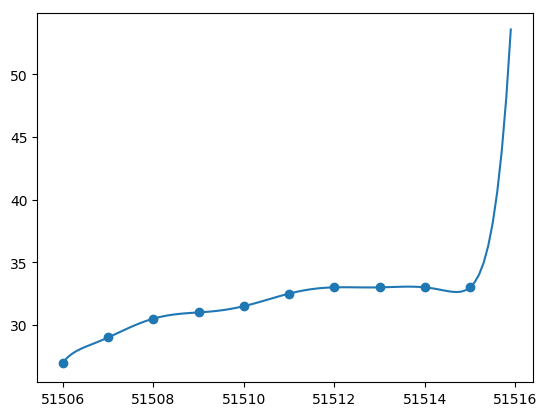

PyObject <matplotlib.collections.PathCollection object at 0x00000000282D6748>

In [29]:
x_new=x[1]:0.1:x[11]
M=length(x_new)
L=zeros(M)
for k=1:M
    ll=0
    for i=1:10
        l=1
        for j=1:10
            if(j!=i) l*=(x_new[k]-x[j])/(x[i]-x[j]) end
            end
        ll+=(l*y[i])
    end
    L[k]=ll
    ll=0
end
plot(x_new,L)
scatter(x[1:10],y[1:10])

In [30]:
#2 Newton method 1
h=0.1
dy=zeros(Float64, 5, 5) #Конечные разности дельта y ii-строка, kk-столбец
for ii=1:5
        dy[ii, 1]=y[ii]
end

uu=5
for kk=2:5
    uu-=1
    for ii=1:uu
        dy[ii, kk]=dy[ii+1, kk-1]-dy[ii, kk-1]
    end
end

In [31]:
function fac(n) #Коэффициенты ak
    if n == 0
        return 1
    end
    return fac(n-1) * n
end

a=zeros(5)
for kk=1:5
a[kk]=dy[1, kk]/(fac(kk-1)*h^(kk-1))
end

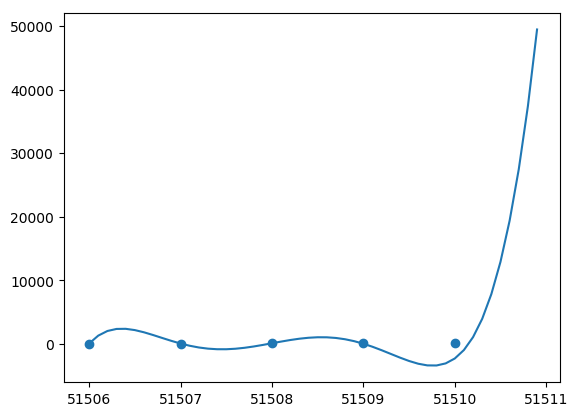

PyObject <matplotlib.collections.PathCollection object at 0x0000000027FC9240>

In [32]:
x_new1=x[1]:0.1:x[6] #Сооружение полинома
M1=length(x_new1)
Nx=zeros(M1)

for k=1:M1
    nn=a[1]
    for kk=2:5
        n1=ones(4)
        for j=1:kk
            n1[kk-1]*=(x_new1[k]-x[j])
        end       
    nn+=a[kk]*n1[kk-1]
    end    
    Nx[k]=nn
    nn=0
end
plot(x_new1,Nx)
scatter(x[1:5],y[1:5])

In [33]:
#3 Newton method 2
dy=zeros(Float64, 5, 5) #Конечные разности дельта y ii-строка, kk-столбец
for ii=1:5
        dy[ii, 1]=y[ii+5]
end

uu=5
for kk=2:5
    uu-=1
    for ii=1:uu
        dy[ii, kk]=dy[ii+1, kk-1]-dy[ii, kk-1]
    end
end

In [34]:
function fac(n) #Коэффициенты ak
    if n == 0
        return 1
    end
    return fac(n-1) * n
end

a=zeros(5)
for kk=1:5
a[kk]=dy[6-kk, kk]/(fac(kk-1)*h^(kk-1))
end

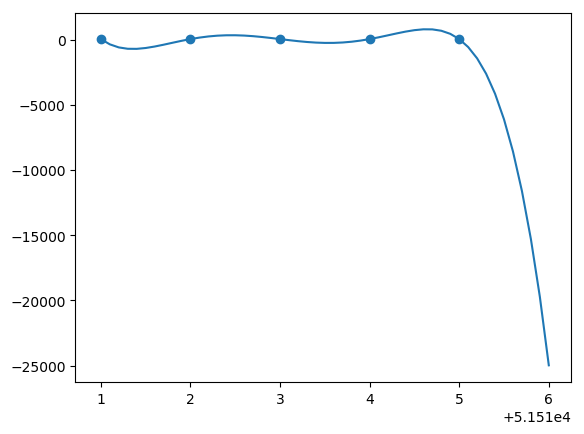

PyObject <matplotlib.collections.PathCollection object at 0x000000002761BC50>

In [35]:
x_new1=x[6]:0.1:x[11] #Сооружение полинома
M1=length(x_new1)
Nx=zeros(M1)

for k=1:M1
    nn=a[1]
    for kk=2:5
        n1=ones(4)
        for j=1:kk
            n1[kk-1]*=(x_new1[k]-x[j+5])
        end       
    nn+=a[kk]*n1[kk-1]
    end    
    Nx[k]=nn
    nn=0
end
plot(x_new1,Nx)
scatter(x[6:10],y[6:10])

In [36]:
#5 Aprox
arr=[]
for i in 0:5
    sum=0
    for j in 1:length(x)
        sum+=(x[j]^i)*y[j]
    end
    push!(arr,sum)
end

  masspum=fill(0.,(6,6))
for i in 1:6
    for j in 1:6
        sum=0
        for t in 1:length(x)
            sum+=(x[t])^(i+j-2)
       end
       masspum[i,j]=sum
    end
end
c=(masspum^(-1)*arr)
ap=[]
for t in 1:length(x)
    push!(ap,((x[t]^5)*c[6]+(x[t]^4)*c[5]+(x[t]^3)*c[4]+(x[t]^2)*c[3]+x[t]*c[2]+c[1]))
end

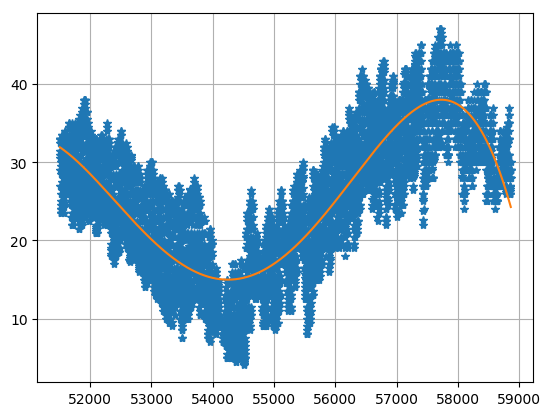

In [37]:
k=linspace(x[1],x[length(x)],length(x))
plot(x[1:length(x)],y[1:length(x)],marker="*",linestyle="")
plot(k,ap)
grid("on")